# Rescomp Data Analysis

In [3]:
import rescomp as rc
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate, sparse
from scipy.stats import pearsonr
from scipy.sparse.linalg import eigs, ArpackNoConvergence
from scipy.sparse import coo_matrix
import math 
import networkx as nx
import itertools
import csv
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 5]
# Set seed for reproducibility
np.random.seed(1)
from math import comb
import h5py
from mpi4py import MPI
from glob import glob
from matplotlib import pyplot as plt
import matplotlib

--------------------------------------------------------------------------

  Local host:   login04
  Local device: mlx5_0
--------------------------------------------------------------------------


In [4]:
results_path = '/home/seyfdall/compute/network_theory/thinned_rescomp/results/'

In [5]:
def get_file_data(hdf5_file='results/erdos_results_0.h5'):
    """
    
    """

    with h5py.File(hdf5_file, 'r') as file:
        vpt_thinned_list = []
        div_pos_thinned_list = []
        div_der_thinned_list = []
        consistency_thinned_list = []

        for group_name in file.keys():
            group = file[group_name]
            if 'mean_vpt_thinned' not in list(group.attrs):
                continue
            vpt_thinned_list.append(group.attrs['mean_vpt_thinned'])
            div_pos_thinned_list.append(group.attrs['div_pos_thinned'])
            div_der_thinned_list.append(group.attrs['div_der_thinned'])
            consistency_thinned_list.append(group.attrs['mean_consistency_thinned'])
            # print('{}, c: {}, vpt_connected: {}, p_thin: {}, vpt_thinned: {}'.format(group_name, c, vpt_connected, p_thin, vpt_thinned))
        # print('vpt_connected_average: {}, vpt_thinned_average: {}'.format(np.mean(vpt_connected_list), np.mean(vpt_thinned_list)))
        
        mean_vpt = np.mean(vpt_thinned_list)
        mean_div_pos = np.mean(div_pos_thinned_list)
        mean_div_der = np.mean(div_der_thinned_list)
        mean_consistency = np.mean(consistency_thinned_list)
        print(f"Number of draws successfully made for {hdf5_file}: {len(vpt_thinned_list)}")
        
        return mean_vpt, mean_div_pos, mean_div_der, mean_consistency

In [11]:
def get_system_data(p_thins, rhos, results_path=results_path):
    """
    
    """
    mean_vpts = np.zeros((len(rhos), len(p_thins)))
    mean_pos_divs = np.zeros((len(rhos), len(p_thins)))
    mean_der_divs = np.zeros((len(rhos), len(p_thins)))
    mean_consistencies = np.zeros((len(rhos), len(p_thins)))

    for i, rho in enumerate(rhos):
        for j, p_thin in enumerate(p_thins):
            hdf5_file = results_path + f"erdos_results_rho={round(rho,2)}_p_thin={round(p_thin,2)}.h5"
            mean_vpts[i,j], mean_pos_divs[i,j], mean_der_divs[i,j], mean_consistencies[i,j] = get_file_data(hdf5_file=hdf5_file)
            print("VPT", mean_vpts[i,j])

    return mean_vpts, mean_pos_divs, mean_der_divs, mean_consistencies

In [7]:
def create_system_plot(values, ax, title):
    """
    
    """
    p_thins = np.concatenate((np.arange(0, 0.8, 0.1), np.arange(0.8, 1.01, 0.02)))
    rhos = [0.1,0.9,1.0,1.1,2.0,5.0,10.0,25.0,50.0]

    cmap = 'viridis'
    norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(values[np.isfinite(values)]))
    sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

    X, Y = np.meshgrid(p_thins, rhos)
    ax.pcolormesh(X, Y, values, shading='nearest', norm=norm, cmap=cmap)
    
    ax.set_title(title)
    ax.set_xlabel('p_thin')
    ax.set_ylabel('rho')
    
    plt.colorbar(mappable=sm, ax=ax)

In [8]:
def create_plots():
    fig, axs = plt.subplots(1,4, figsize=(14,3.2))
    p_thins = np.concatenate((np.arange(0, 0.8, 0.1), np.arange(0.8, 1.01, 0.02)))
    rhos = [0.1,0.9,1.0,1.1,2.0,5.0,10.0,25.0,50.0]
    
    mean_values = get_system_data(p_thins, rhos, results_path=results_path)
    titles = ['VPT', 'Div_Pos', 'Div_Der', 'Consistency']

    for i in range(len(mean_values)):
        # print(mean_values[i])
        create_system_plot(mean_values[i], axs[i], titles[i])
    plt.tight_layout()
    plt.show()

### Analysis on c=4

In [9]:
results_1_path = results_path + 'erdos_results_rho=2.0_p_thin=0.1.h5'
get_file_data(hdf5_file=results_1_path)

Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=2.0_p_thin=0.1.h5: 35


(0.002285714285714237,
 0.5308942254124952,
 0.009543368828840226,
 0.9641997854383579)

Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.1_p_thin=0.0.h5: 36
VPT 0.007222222222222167
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.1_p_thin=0.1.h5: 98
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.1_p_thin=0.2.h5: 118
VPT 0.003389830508474564
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.1_p_thin=0.3.h5: 147
VPT 0.0010204081632652965
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.1_p_thin=0.4.h5: 36
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.1_p_thin=0.5.h5: 95
VPT 0.0
Number of draws successfully made for /home/seyfdall/compu

/home/seyfdall/.conda/envs/reservoir/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/seyfdall/.conda/envs/reservoir/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.9_p_thin=0.7.h5: 90
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.9_p_thin=0.8.h5: 27
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.9_p_thin=0.82.h5: 38
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.9_p_thin=0.84.h5: 33
VPT 0.00696969696969709
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.9_p_thin=0.86.h5: 39
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/results/erdos_results_rho=0.9_p_thin=0.88.h5: 36
VPT 0.0
Number of draws successfully made for /home/seyfdall/compute/network_theory/thinned_rescomp/

OSError: Unable to synchronously open file (bad object header version number)

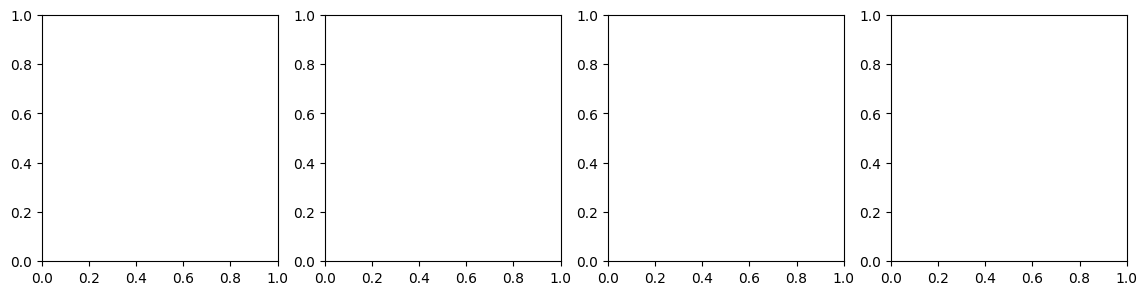

In [12]:
create_plots()